# Project: Investigate a Dataset :TMDB Dataset Analysis


## Part 1: Introduction


<a id='intro'></a>


> **Details about Dataset**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In this project i will try to take a look at some of the indicator mentioned below and perform data analysis on them and gain some insights on it.

   > **Indicator 1**: Genre
   
   > Every movie has some genre associated with it. The movies has many genre like Action,Adventure,Science,Fiction,           Thriller,etc. 
   
   > **Indicator 2**: Revenue
   
   > For every movie, revenue is the most important factor. There could be many other things like popularity, length of movie, star cast and production of movie which might affect the revenue.
   


   > **Questions to investigate**: 

   > **Which genres are most popular from year to year?**

   > **What are the factors associated with the revenue of the movies?** 

## Part 2: Data formatting and cleaning


### 2.1 Data import and initial checks

In [26]:
#  set up import statements for all of the packages used in the file
import pandas as pd
import numpy as np
import seaborn as sns
import ast
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [27]:
#read data from csv
df=pd.read_csv('tmdb-movies.csv')

In [28]:
# Check the first few rows of the data to get a feel for what values the columns can contain
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### 2.2 Imputation of missing values

In [4]:
#Check to see if there are any missing values in the data
df[df.columns[:]].isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Of the columns of interest only Genre has missing values.

In [5]:
#look for the genre nan values of genres
df[pd.isnull(df.genres)].loc[:,('id','original_title','genres')]

,id,original_title,genres
424,363869,Belli di papÃ,NaN
620,361043,All Hallows' Eve 2,NaN
997,287663,Star Wars Rebels: Spark of Rebellion,NaN
1712,21634,Prayers for Bobby,NaN
1897,40534,Jonas Brothers: The Concert Experience,NaN
2370,127717,Freshman Father,NaN
2376,315620,Doctor Who: A Christmas Carol,NaN
2853,57892,Vizontele,NaN
3279,54330,ì•„ê¸°ì™€ ë‚˜,NaN
4547,123024,London 2012 Olympic Opening Ceremony: Isles of...,NaN


**Removing nan values from Genre Column:**
There are 23 movies in that list that have nan value. As we can see 23 is a very small number in the scope of the full dataset, something like two-tenths of a percent. So, it's completely reasonable to eliminate them from the dataframe, before working on the data manipulation. 

In [6]:
#remove data points with missing genre values
df=df[pd.notnull(df.genres)]

#check the nulls were eliminated
df[pd.isnull(df.genres)].loc[:,('id','original_title','genres')]

,id,original_title,genres


In [7]:
#looking for duplicates values
sum(df.duplicated())

1

In [8]:
df.drop_duplicates(inplace=True) #drop the duplicate values

In [9]:
#looking for values in budget columns 
df['budget']

0        150000000
1        150000000
2        110000000
3        200000000
4        190000000
5        135000000
6        155000000
7        108000000
8         74000000
9        175000000
10       245000000
11       176000003
12        15000000
13        88000000
14       280000000
15        44000000
16        48000000
17       130000000
18        95000000
19       160000000
20       190000000
21        30000000
22       110000000
23        40000000
24        28000000
25       150000000
26        68000000
27        81000000
28        20000000
29        61000000
           ...    
10836            0
10837            0
10838            0
10839            0
10840            0
10841        75000
10842            0
10843            0
10844            0
10845            0
10846            0
10847            0
10848      5115000
10849            0
10850            0
10851            0
10852            0
10853            0
10854            0
10855       700000
10856            0
10857       

**Cleaning the budget and revenue Column**
The budget and revenue columns have large amount of zeros values in the data. So, to deal with this problem, we are going to first replace it with nan values and then take mean of the values and then fill the nan values with mean.

In [30]:
#replace zero values with nan
df=df.replace({'budget': {0: np.nan}})
df=df.replace({'revenue': {0: np.nan}})

#df['budget']

In [31]:
#finding the mean for the columns
mean_budget = df['budget'].mean()
mean_revenue = df['revenue'].mean()

print(mean_budget)

print(mean_revenue)

30739432.899226304
89220658.32474227


In [33]:
#filling the column values with mean
df['budget'] = df.budget.fillna(mean_budget)
df['revenue'] = df.revenue.fillna(mean_revenue)


#### Splitting the values of Genre column

> **Genre_column**: The ‘genres’, contain multiple values separated by pipe (|) characters. We need each category of the genre to be separated to work on the plot so we need to separate the values in Genre column them, so that we need to separte those genre to work on each of the genre values. 

In [13]:
#splitting the genre column into multiple columns
genre_splits = df['genres'].astype(str).apply(lambda x: pd.Series(x.split('|')))
genre_splits


,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN
5,Western,Drama,Adventure,Thriller,NaN
6,Science Fiction,Action,Thriller,Adventure,NaN
7,Drama,Adventure,Science Fiction,NaN,NaN
8,Family,Animation,Adventure,Comedy,NaN
9,Comedy,Animation,Family,NaN,NaN


Now that we have genre values separated we need to concatente into dataframe.

In [14]:
new_df=pd.concat([df,genre_splits], axis=1)

In [15]:
new_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,0,1,2,3,4
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,NaN
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,NaN,NaN


In [16]:
#renaming the column for our understanding of genre column
new_df = new_df.rename(columns = {
    0:'Genre_1',
    1:'Genre_2',
    2:'Genre_3',
    3:'Genre_4',
    4:'Genre_5'
})


Now that we have too many columns in the dataframe, but we need the columns like popularity(to see popularity of movies),
Genre(to see trends of different genre) and release year(release year of the movies). So we have created a new data frame called new_df1. We also need to reshape the dataframe as we have now five different genre columns we need only one column containing all the genre_values into it. So we used the Melt function to reshape the dataframe.

In [17]:
#combining the gere_column values into a single column
new_df1=new_df[['popularity','release_year','Genre_1','Genre_2','Genre_3','Genre_4','Genre_5']]

df1_melted=pd.melt(new_df1, id_vars=["popularity",'release_year'], 
                  var_name="Genre_type", value_name="Genre_value")

#drop the nan values from the data
df1_melted = df1_melted.dropna(how='any')

#df1_melted.isnull().sum()

In [18]:
df1_melted.isnull().sum()

popularity      0
release_year    0
Genre_type      0
Genre_value     0
dtype: int64

Now that we have desired column, needed to plot the different genres and see its trends over period of time. We are now creating a column called decade, so that we can plot the genre values over decades.

In [19]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1950,1960,1970,1980,1990,2000,2010,2015]

bin_names = ['1960','1970','1980','1990','2000','2010','2015']


# Creates decade column
df1_melted['decade'] = pd.cut(df1_melted['release_year'], bin_edges, labels=bin_names)

#df1_melted

In [20]:
#convert the decade type to numeric
df1_melted['decade'] = pd.to_numeric(df1_melted['decade'])

In [21]:
df1_grouped = df1_melted.groupby(['Genre_value', 'decade'],as_index=False)

In [22]:
#df1_grouped.describe()

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

In [23]:
#mean of groupby object
df1_means=df1_grouped.mean()


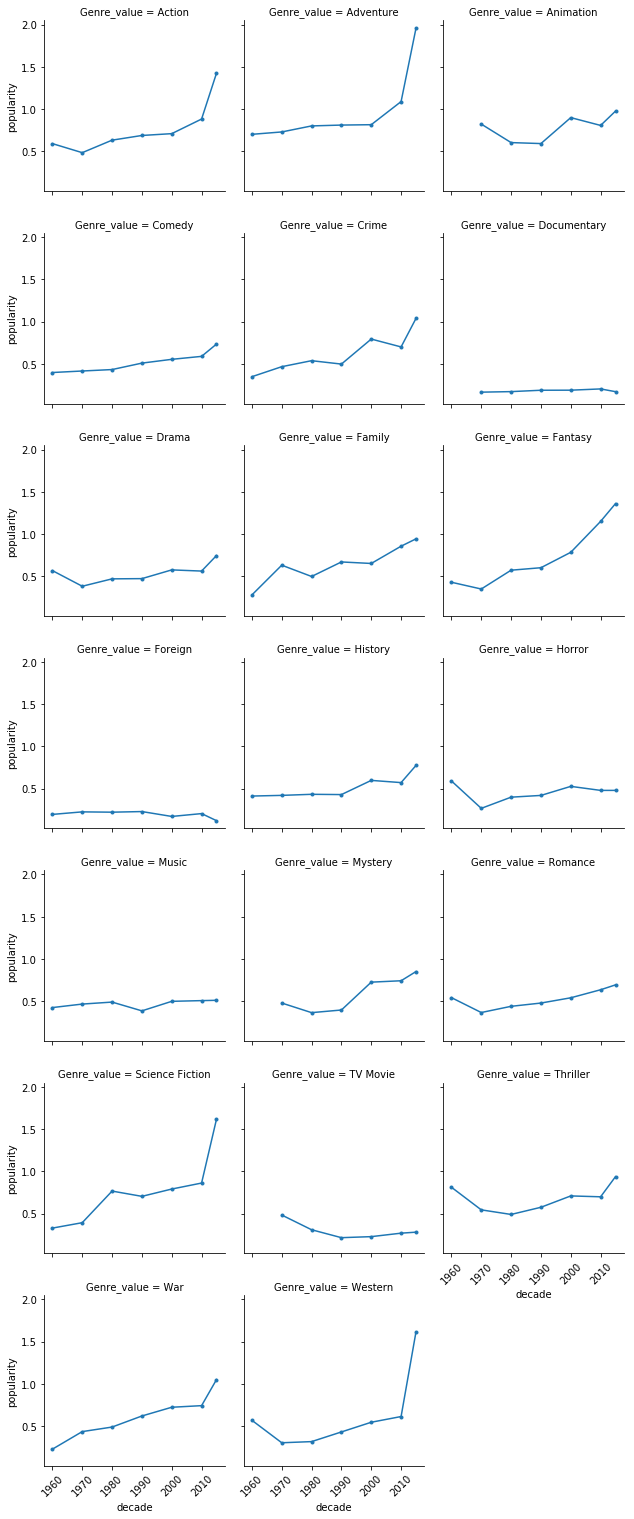

In [24]:
#plotting with facegrid
g = sns.FacetGrid(df1_means, col="Genre_value",col_wrap=3)
g = g.map(plt.plot,"decade","popularity",marker='.')
g.set_xticklabels(['1950','1960','1970','1980','1990','2000','2010','2020'])

#loop to set the labels
for ax in g.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
    for label in ax.get_xticklabels():
        label.set_rotation(45)

Now that we have plot for 20 different genre we will explore each one of them below:

<ol>
    <li>**Action:**</li><p> 
 As can be seen from the graph, popularity during 1970 is less compared to other decades nearly equal 0.4, whereas the popularity after 1970 increased steadily between 1980 and 2010, from about more than 0.5 popularity value.And it has currently gain the highest amongst all the decades in the current decade around 1.4</p><br>

<li>**Adventure:**</li><p> 
 This popularity for this genre has been quite stable during the decades of 1960 to 1990. But there has steady increase in popularity 2000 to current the decade and highest can be seen around 2.0 in the current decade, which is far more than the action genre during the same decade.</p><br>


<li>**Animation:**</li><p> The popularity for this genre has been not been quite popular during the years. From the graph we can see the popularity went down during the decade 1980 and it was same during the 1990. There has been slightly increase in popularity of this genre during the year 2000 and it increased during the current decade </p><br>

<li>**Comedy:**</li> <p>The popularity for Comedy rose steadily over the decades around 0.5 and looks like there is small increase in popularity during the current decade.   
</p> <br>


<li>**Crime**</li><p> This genre has been quite popular during the decades of 1960 to 1990, but as compared to its previous decades its increased during 2000 and 2010. </p><br>


<li>**Documentary**</li><p> This genre has been not been quite popular among the people which can be clearly seen from the graph, its popularity quite steady during the years.</p> <br>
    

<li>**Drama**</li> <p>This genre has popularity of 0.5 during 1960 but the there is slight fall during 1970 and then it started picking up during 2000.</p><br>


<li>**Family**</li><p> This genre has quite low popularity during 1960, but the slight increase in 1970. It has steady growth in popularity during 1980 to 2000.</p><br>


<li>**Fantasy**</li><p> This genre has quite low popularity during 1960 and 1970s. There is dramatic growth from 1980s to current period, where it recored highest popularity of around 2.0 during the current period.</p><br>

<li>**Foreign**</li><p> This genre has lowest popularity amongst all the genres, which is aroound 0.1, the popularity is steady during the decades and went to almost zero during the current period.</p><br>


<li>**History**</li><p>In 1960 the popularity was very low at around 0.4, which was steady over the four decades. There is slight increase in popularity during 2000 and 2010.</p><br>


<li>**Horror**</li><p>In 1960 the popularity was around 0.5, which then fall during the next decade. There is slight increase in popularity during 1970 and remained steady over the years.</p><br>


<li>**Music**</li><p>The popularity remained steady close to 0.5 in first three decades and this was followed by a slight fall in 1990, which then remained the same in next three decades. </p><br>


<li>**Mystery**</li><p> The popularity for this genre was nearly the same for first three decades, it then went up in 2000 and then a gradual rise in the popularity.</p><br>


<li>**Romance**</li><p>Romance has popularity of more than 0.5 in 1960 but it went down in the next decade and from 1980 the popularity increased steadily after the following decades.</p><br>



<li>**Science Fiction**</li><p>For the first two decades,science fiction was not much popular among the people. But in 1980s popularity increased to more than 0.5 and increased steadily after the next three decades. It has seen highest popularity in the current decade of more than 1.5</p><br>


<li>**TV Movie**</li><p>In 1970,it has popularity of 0.5 which then kept decreasing over the decades.</p><br>


<li>**Thriller**</li><p>Thriller was quite popular in 1960, with close to 0.8, which then fell down in 1970. In 1980 starts picking up the popularity and then in 2000 and 2010 popularity remained steady and there was a small increase in current decade. 
</p><br>


<li>**War**</li><p>In 1960, the popularity was quite low was 0.2,but from 1970 to 2010 popularity went up and it went to almost double the number in current period.
</p><br>


<li>**Western**</li><p>During the decade of 1960 it has popularity of more than 0.5 but it went down in the next decade. Between 1980 to 2010 popularity increased in small number for every decade, but for current decade it is almost 3 times the first decade.
</p><br>


</ol>


### Research Question 2  ( What kinds of properties are associated with revenue of movies?)

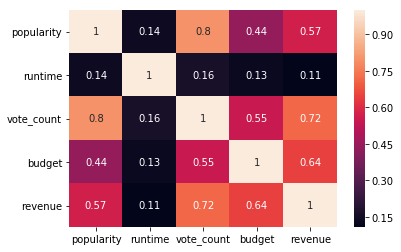

In [25]:
sns.heatmap(df[['popularity', 'runtime','vote_count','budget','revenue']].corr(),annot=True);

<ol>
  <p>The above correlation matrix heatmap demonstrates the dependence between multiple variables at the same time. The variables we have here are the factors which I thought contribute the most towards the revenue generation of a movie.</p> <br>
    
 ** <li>Popularity:</li>**
  <p>The more popular a movie is on our website, the revenue it should generate. As we can see, revenue and popularity have a high correlation coefficient of 0.56. The two are positively correlated. This also indicates that the popularity metric on the website is a good indicator of the success of a movie.</p><br>
  
  
  **<li>Runtime:</li>**
    
   <p>I didn’t initially anticipate a lot of correlation between runtime and the profit generation of a movie, but surprisingly we see that there is a positive correlation coefficient of 0.11 for the two. This indicates that it is generally a good idea to have a runtime of 99.0(median of runtime)</p> <br>
    
 ** <li>Vote count</li>** 
  <p>My understanding for vote count in terms of having effect of profit is, the more number of votes for a movie, the more people have watched it. But again, there could be many modes through which they might have watched it. Modes like theatre show, purchased CD, etc. will be more beneficial in terms of benefitting the revenue/profit generation. On the other hand, modes like pirated CDs, online streaming, or services like Amazon Prime Video won’t bring in more money to the producers. Again, only number of votes don’t matter but what the people voted also matters. For example, if a movie has 500 votes but if 350 people have downvoted the movie, it might not actually do good. In conclusion, this can be a complicated correlation. Despite that, we see that there is a strong positive correlation of 0.72. This indicates that the more number of people vote a movie, the more it get’s attention and possible people go and watch it. </p> <br>
  
   **<li>Budget:</li>**
     <p>The revenue of a movie is what we get from the budget of the movies. The budget has high correlation coefficient of 0.64. Thus,the two are positively correlated. This shows that budget of movies is one of the most important factor for the movies to get high revenue. </p> <br>
       
</ol>

<a id='conclusions'></a>
## Conclusions:



After diving into a few questions about the TMDB dataset of the movies in the dataset we found some interesting insights. In this analysis, we have considered all the 20 genres provided in the data and we have analysed the trends for each of them over the years. The genre like action, adventure,fantasy, science fiction the popularity is growing over the years,whereas the genres like documentary,comedy,tv movie,thriller and drama we haven't see much gain in the popularity. 

We have also tried to look for some of the factors which might be associated with the revenue of the movies like popularity, runtime,votecount and budget. We have found out that the factors like votecount,budget and popularity have higher corelation with revenue of the movies whereas the runtime has pretty low correaltion with revenue. 

## Limitations of analysis:  
We are trying to predict a metric which is complicated. If we were able to build a successful model which would give us the exact success formula in movie industry, it would be unrealistic. The metrics I had are a subset of all the information that exists for a movie. Just like this website, there might be several websites which measure vote count, popularity, etc. Hence, we cannot rely much on the data we have. But whatever our data tells us can be as close as we can get to accurately predicting what might be a movie’s revenue. We have also tried to predict trend of the genres over the years. But,most of the movies has more than one genres, so we separated each of them to see the trends over the years.

## Future work:
Of course, some of the most deterministic factors for a movie’s success are the people who get involved in the creation of that piece of artwork. Here we should next account for factors like director of the movie, cast, production company, etc. I would also love to have data on songs in the movie. In my country, the movie industry has a lot of focus on careful selection and embedding of songs since they are one of the most important ways to promote a movie.  


<p></p>